#Digits Dataset



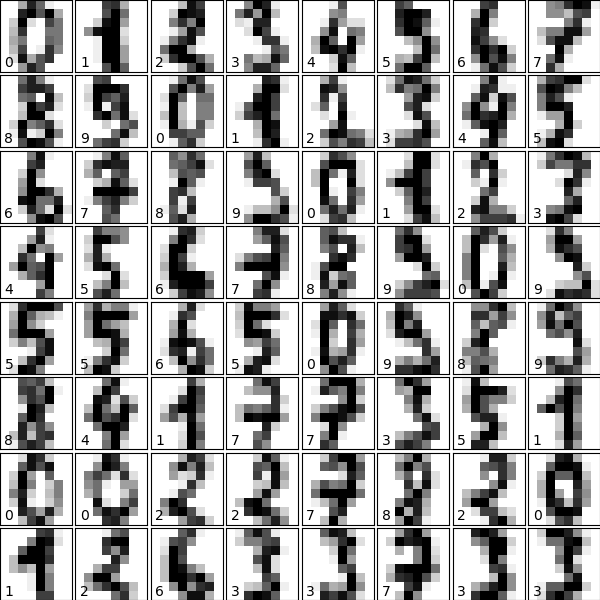

*   5620 Total Data
*   3823 Train
*   1797 Test 
*   8 * 8 Pixels = 64 Features
*   List item
*  Pixels intensities range are from white 0 to black 16


## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Collection

In [ ]:
# load_digits return an object from sckit-learn , Object includes Digits Datasets MetaData
# MetaData -- Information about Digits Datasets
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

##Data Pre-processing

## Data Exploration & Visualization

In [ ]:
# Labels
digits.target[::200]

array([0, 1, 4, 2, 4, 1, 7, 2, 2])

In [ ]:
# 0 to 16
# Data array is digits pictures
# Each picture has 8 * 8 pixels = 64 features
digits.data[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [ ]:
# 1797 rows(sample)
# 64 columns(feature)
digits.data.shape

(1797, 64)

In [ ]:
digits.target.shape

(1797,)

In [ ]:
# Each picture is 2D araay = 8 * 8
digits.images[7]

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

In [ ]:
# float64
type(digits.images[15])

numpy.ndarray

In [ ]:
# load_digits convert 2D array of each picture to 1D array
digits.data[7]

array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
       11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
        8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
        1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.])

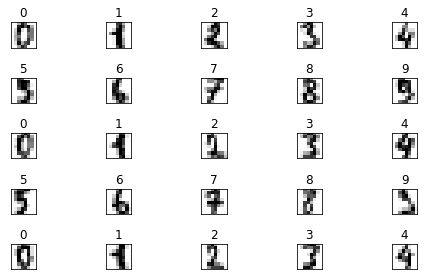

In [ ]:
# Show 24 digits
figure, axes = plt.subplots(nrows=5, ncols=5, figsize=(8,4))
for item in zip(axes.ravel(), digits.images, digits.target):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  # remove marks
  axes.set_xticks([]) 
  axes.set_yticks([]) 
  axes.set_title(target)
  plt.tight_layout()


##Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 20% test_size, 80% train_size
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.20)

In [ ]:
# n_neighbors = 5
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predicted = knn.predict(X_test)

In [ ]:
expected = y_test

In [ ]:
predicted[:17]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3])

In [ ]:
expected[:17]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3])

In [ ]:
wrong = [(p, e) for (p, e) in zip (predicted, expected) if p != e]

wrong

[(5, 3), (8, 9), (4, 9), (7, 3), (7, 4)]

## Model Evaluation

In [ ]:
# Return accuracy of predicting test data
knn.score(X_test, y_test) 

0.9861111111111112

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion = confusion_matrix(expected, predicted)

# Row 0 -- 38 zero predicted as 0
# Row 3 -- 39 three predicted as 3, one 3 predicted as 5 and one 3 predicted as 7
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

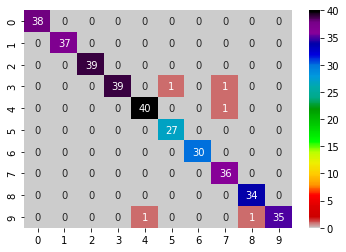

In [ ]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

###KFold Class

In [ ]:
from sklearn.model_selection import KFold
# n_split -- number of layers
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

In [ ]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [ ]:
print(f"Mean accuracy : {scores.mean():.2%}")

Mean accuracy : 98.78%


In [ ]:
print(f"Accuracy standard devision : {scores.std():.2%}")

Accuracy standard devision : 0.74%
